# Introduction

<b>Executive Summary:2018 Major League Baseball Season Analysis</B> 

In this analysis of the 2018 Major League Baseball (MLB) season, I examined the performance metrics of both teams and individual players. Our primary focus revolved around identifying correlations between the top-performing players and the overall success of their respective teams. By delving into key statistical categories such as Runs, Hits, Home Runs, and Wins, W aimed to uncover insights into what factors most significantly contributed to team victories and, ultimately, postseason achievements.

Our findings highlighted the dominance of teams like the <b>Boston Red Sox, Cleveland Indians,</B> and the <b>Oakland Athletics</b>, evident through their players' frequent appearances in top rankings across various offensive categories. The Boston Red Sox's victory in the 2018 World Series further exemplified this trend, underscoring the impact of having a strong offensive lineup.

Conversely, the performance of teams like the Milwaukee Brewers and the Los Angeles Dodgers provided a different perspective. Despite leading in regular-season wins, the Brewers did not advance to the World Series, while the Dodgers, with fewer top-10 ranked players in key statistics, made a notable appearance. This outcome emphasizes the multifaceted nature of baseball, where success is not solely determined by star player statistics but also by factors such as team depth, strategic decisions, and overall team dynamics.

In conclusion, while individual player performance in areas like Runs, Hits, and Home Runs is crucial, our analysis suggests that it is the collective team effort and strategic gameplay that ultimately lead to success in MLB. The 2018 season served as a compelling case study in understanding the complex interplay of various factors contributing to a team's journey to the World Series.



# Import Libraries


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

<span style="color:red;">There are two datasets used in this project. </span>

    1) atbats.csv
    2) teams.csv

<b>atbats.csv<b> 

In [2]:
# Define the file path for the atbats.csv
file_path = (r"atbats.csv")

In [3]:
# Read the atbats.csv file
data_atbats = pd.read_csv(file_path)

In [4]:
# The variable data_atbats contains the data from the atbats.csv file
data_atbats

,name,year,stint,team,lg,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerID
0,Jose Abreu,2018,1,CHA,AL,128,499,68,132,36,...,2.0,0.0,37,109.0,7.0,11.0,0.0,6.0,14.0,abreujo02
1,Ronald Acuna,2018,1,ATL,NL,111,433,78,127,26,...,16.0,5.0,45,123.0,2.0,6.0,0.0,3.0,4.0,acunaro01
2,Willy Adames,2018,1,TBA,AL,85,288,43,80,7,...,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0,adamewi01
3,Matt Adams,2018,1,WAS,NL,94,249,37,64,9,...,0.0,0.0,24,55.0,2.0,4.0,0.0,0.0,6.0,adamsma01
4,Jim Adduci,2018,1,DET,AL,59,176,19,47,8,...,1.0,0.0,6,45.0,0.0,0.0,2.0,1.0,2.0,adducji02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Chris Young,2018,1,LAA,AL,56,113,17,19,2,...,2.0,0.0,11,37.0,0.0,2.0,1.0,1.0,1.0,youngch04
524,Brad Ziegler,2018,1,MIA,NL,53,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,zieglbr01
525,Ryan Zimmerman,2018,1,WAS,NL,85,288,33,76,21,...,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0,zimmery01
526,Ben Zobrist,2018,1,CHN,NL,139,455,67,139,28,...,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0,zobribe01


In [5]:
# Check the name of each coloumns of the dataset
print(data_atbats.columns)

Index(['name', 'year', 'stint', 'team', 'lg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'playerID'],
      dtype='object')


In [6]:
#inspect the object types of each coloumn
data_atbats.dtypes

name         object
year          int64
stint         int64
team         object
lg           object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
playerID     object
dtype: object

<span style="color:red;">I applied the same methodology to load and conduct an initial exploration of the second dataset (teams.csv). This    included importing the data, performing preliminary assessments for data quality and structure, and identifying key variables relevant to the analysis objectives.</span>

<b>teams.csv<b> 

In [7]:
# Define the file path for the teams.csv
file_path = (r"teams.csv")

In [8]:
# Read the atbats.csv file
data_teams = pd.read_csv(file_path)

In [9]:
# The variable data_players contains the data from the players.csv file
data_teams

,yearID,lgID,teamID,divID,Rank,G,W,L,DivWin,WCWin,...,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF
0,2018,NL,ARI,W,3,162,82,80,N,N,...,522,1448,75,152,0.988,Arizona Diamondbacks,Chase Field,2242695.0,108,107
1,2018,NL,ATL,E,1,162,90,72,Y,N,...,635,1423,80,134,0.986,Atlanta Braves,SunTrust Park,2555781.0,100,100
2,2018,AL,BAL,E,5,162,47,115,N,N,...,589,1203,104,159,0.982,Baltimore Orioles,Oriole Park at Camden Yards,1564192.0,96,97
3,2018,AL,BOS,E,1,162,108,54,Y,N,...,512,1558,77,106,0.987,Boston Red Sox,Fenway Park II,2895575.0,104,102
4,2018,AL,CHA,C,4,162,62,100,N,N,...,653,1259,114,135,0.981,Chicago White Sox,U.S. Cellular Field,1608817.0,97,98
5,2018,NL,CHN,C,2,163,95,68,N,Y,...,622,1333,104,155,0.983,Chicago Cubs,Wrigley Field,3181089.0,107,106
6,2018,NL,CIN,C,5,162,67,95,N,N,...,532,1258,95,144,0.984,Cincinnati Reds,Great American Ball Park,1629356.0,103,104
7,2018,AL,CLE,C,1,162,91,71,Y,N,...,407,1544,83,123,0.986,Cleveland Indians,Progressive Field,1926701.0,104,102
8,2018,NL,COL,W,2,163,91,72,N,Y,...,525,1409,74,162,0.988,Colorado Rockies,Coors Field,3015880.0,117,116
9,2018,AL,DET,C,3,162,64,98,N,N,...,491,1215,95,126,0.984,Detroit Tigers,Comerica Park,1856970.0,101,102


In [10]:
## Check the name of each coloumns of the dataset
print(data_teams.columns)

Index(['yearID', 'lgID', 'teamID', 'divID', 'Rank', 'G', 'W', 'L', 'DivWin',
       'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park',
       'attendance', 'BPF', 'PPF'],
      dtype='object')


In [11]:
#inspect the object types of each coloumn
data_atbats.dtypes

name         object
year          int64
stint         int64
team         object
lg           object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
playerID     object
dtype: object

<span style="color:red;"> These two files contain the essential player performance data and team statistics necessary to address our research question. However, they require cleaning and the calculation of key baseball hitter metrics, such as Batting Average (AVG), On-Base percentage (OPS), Runs Batted in (RBI) and more complex calculations like Wins Above Replacement (WAR), among others.</span>

# Clean the Data

<span style="color:red;">This initial phase of cleaning we will lay the groundwork for our analysis, enabling us to understand the range, and trends,  within the dataset. By examining the at-bat data, we'll be able to identify any anomalies, patterns, or insights that could influence player evaluations. </span>

In [12]:
# initialize empty list to store the atbat data
data_list = []

data = {
    'atbat': r"atbats.csv"
    }

data_list = []

# loop through each key-value pair in the data dictionary
for key, file_path in data.items():
    # read the CSV file into a dataframe
    atbat_df = pd.read_csv(file_path)
    
    # append the dataframe to data_list
    data_list.append(atbat_df)
    
# concatenate all dataframes in the list into a single atbats dataframe
atbats_df = pd.concat(data_list, ignore_index=True)


In [13]:
# display data to examine
atbats_df

,name,year,stint,team,lg,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerID
0,Jose Abreu,2018,1,CHA,AL,128,499,68,132,36,...,2.0,0.0,37,109.0,7.0,11.0,0.0,6.0,14.0,abreujo02
1,Ronald Acuna,2018,1,ATL,NL,111,433,78,127,26,...,16.0,5.0,45,123.0,2.0,6.0,0.0,3.0,4.0,acunaro01
2,Willy Adames,2018,1,TBA,AL,85,288,43,80,7,...,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0,adamewi01
3,Matt Adams,2018,1,WAS,NL,94,249,37,64,9,...,0.0,0.0,24,55.0,2.0,4.0,0.0,0.0,6.0,adamsma01
4,Jim Adduci,2018,1,DET,AL,59,176,19,47,8,...,1.0,0.0,6,45.0,0.0,0.0,2.0,1.0,2.0,adducji02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Chris Young,2018,1,LAA,AL,56,113,17,19,2,...,2.0,0.0,11,37.0,0.0,2.0,1.0,1.0,1.0,youngch04
524,Brad Ziegler,2018,1,MIA,NL,53,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,zieglbr01
525,Ryan Zimmerman,2018,1,WAS,NL,85,288,33,76,21,...,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0,zimmery01
526,Ben Zobrist,2018,1,CHN,NL,139,455,67,139,28,...,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0,zobribe01


<span style="color:red;">
To enhance clarity and ensure that our dataset is easily understood, I updated the headers by replacing the current abbreviations with their fully spelled-out terms. Abbreviations, while convenient, can often lead to confusion, especially for those who are not intimately familiar with the context or specifics of baseball statistics. </span>

In [14]:
# Dictionary of abbreviations to full terms
abbreviations = {
    'name': 'Player Name',
    'year': 'Year',
    'stint': 'Stint',
    'team': 'Team',
    'lg': 'League',
    'G': 'Games',
    'AB': 'At Bats',
    'R': 'Runs',
    'H': 'Hits',
    '2B': 'Doubles',
    '3B': 'Triples',
    'HR': 'Home Runs',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Bases on Balls',
    'SO': 'Strike Outs',
    'IBB': 'Intentional Walks',
    'HBP': 'Hits by Pitch',
    'SH': 'Sacrifice Hits',
    'SF': 'Sacrifice Flies',
    'GIDP': 'Ground Into Double Plays',
    'playerID': 'Player ID'
}

# Rename the columns using the dictionary
atbats_df.rename(columns=abbreviations, inplace=True)

# Display the new column names to verify they've been updated
atbats_df.head(5)

,Player Name,Year,Stint,Team,League,Games,At Bats,Runs,Hits,Doubles,...,Stolen Bases,Caught Stealing,Bases on Balls,Strike Outs,Intentional Walks,Hits by Pitch,Sacrifice Hits,Sacrifice Flies,Ground Into Double Plays,Player ID
0,Jose Abreu,2018,1,CHA,AL,128,499,68,132,36,...,2.0,0.0,37,109.0,7.0,11.0,0.0,6.0,14.0,abreujo02
1,Ronald Acuna,2018,1,ATL,NL,111,433,78,127,26,...,16.0,5.0,45,123.0,2.0,6.0,0.0,3.0,4.0,acunaro01
2,Willy Adames,2018,1,TBA,AL,85,288,43,80,7,...,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0,adamewi01
3,Matt Adams,2018,1,WAS,NL,94,249,37,64,9,...,0.0,0.0,24,55.0,2.0,4.0,0.0,0.0,6.0,adamsma01
4,Jim Adduci,2018,1,DET,AL,59,176,19,47,8,...,1.0,0.0,6,45.0,0.0,0.0,2.0,1.0,2.0,adducji02


<span style="color:red;">Next, I organizined the dataframe by league, starting with the American League (AL) first. </span> 

In [15]:
# sorted by 'League' with 'AL' first
atbats_df_sorted = atbats_df.sort_values(by='League').reset_index(drop=True)

# Display the sorted DataFrame to verify 'AL' is first
atbats_df_sorted[['League', 'Player Name']]

,League,Player Name
0,AL,Jose Abreu
1,AL,Martin Maldonado
2,AL,Luke Maile
3,AL,Mikie Mahtook
4,AL,Manny Machado
...,...,...
523,NL,Jeff Mathis
524,NL,Brandon Crawford
525,NL,Kyle Crick
526,NL,Michael Conforto


# Added New Player Measurements 

<b>Batting Average (BA)</b> is a statistic that measures a hitter's performance at the plate. It's calculated by dividing the number of base hits by the total number of official at-bats. 

<b>On-Base Percentage (OBP)</b> is a statistic in baseball that measures how frequently a batter reaches base. It's considered a more comprehensive measure of a player's offensive performance compared to the batting average, as OBP includes walks, hits, and hit by pitches, recognizing the value of avoiding outs.

<b>Runs Batted In (RBI)</b> is a statistic in baseball that measures the number of runs a player helps to score. An RBI is credited to a batter when the outcome of their at-bat results in a run being scored, except in certain situations.

In [16]:
# Calculate Batting Average (BA) - Number of Hits divided by the number of At Bats; rounded the near hundreth
atbats_df_sorted['Batting Avg'] = (atbats_df_sorted['Hits'] / atbats_df_sorted['At Bats'].replace(0, np.nan)).round(3)

# Calculate On-Base Percentage (OBP) - Number of Hits, Base on Balls, At bats, 
atbats_df_sorted['OnBase Percentage'] = ((atbats_df_sorted['Hits'] + atbats_df_sorted['Bases on Balls'] + atbats_df_sorted['Hits by Pitch']) /
                                         (atbats_df_sorted['At Bats'] + atbats_df_sorted['Hits by Pitch'] + atbats_df_sorted['Sacrifice Flies']).replace(0, np.nan)).round(3)

# calculate Runs Batted In (RBI)
atbats_df_sorted['Runs Batted In Calculated'] = atbats_df_sorted['Hits'] + atbats_df_sorted['Doubles'] + atbats_df_sorted['Triples'] + atbats_df_sorted['Home Runs'] + atbats_df_sorted['Sacrifice Flies'].astype(int)


In [17]:
print("Calculted RBIs, OPS, and BA for each player:")
atbats_df_sorted[['Player Name', 'Runs Batted In', 'OnBase Percentage', 'Batting Avg']]

Calculted RBIs, OPS, and BA for each player:


,Player Name,Runs Batted In,OnBase Percentage,Batting Avg
0,Jose Abreu,78.0,0.349,0.265
1,Martin Maldonado,32.0,0.297,0.223
2,Luke Maile,27.0,0.374,0.248
3,Mikie Mahtook,29.0,0.301,0.202
4,Manny Machado,65.0,0.435,0.315
...,...,...,...,...
523,Jeff Mathis,20.0,0.299,0.200
524,Brandon Crawford,54.0,0.355,0.254
525,Kyle Crick,0.0,NaN,NaN
526,Michael Conforto,82.0,0.403,0.243


<span style="color:red;"> Finally,I ranked the players by highest OBP and by leaguage as OBP is often considered a better indicator of a player's offensive value that encompasses a wider range of positive outcomes for a hitter. I also removed NaN's from the data (players with no infomration). </span>

In [18]:
# Drop rows where 'BA' is NaN
atbats_df_sorted = atbats_df_sorted.dropna(subset=['Batting Avg'])

# Drop rows where 'BA' is 0.0
atbats_df_sorted = atbats_df_sorted[atbats_df_sorted['Batting Avg'] != 0.0]

# Sort the DataFrame first by 'League' and then by 'BA'
atbats_df_sorted = atbats_df_sorted.sort_values(by=['League', 'OnBase Percentage'], ascending=[True, False])

# sorted into AL and NL players
al_players = atbats_df_sorted[atbats_df_sorted['League'] == 'AL']
nl_players = atbats_df_sorted[atbats_df_sorted['League'] == 'NL']

In [19]:
# Now print the top AL players by OBP
print("Top 5 AL players with the highest OBP:")
al_players[['Player Name', 'League', 'OnBase Percentage']]


Top 5 AL players with the highest OBP:


,Player Name,League,OnBase Percentage
122,Mike Trout,AL,0.575
225,Mookie Betts,AL,0.505
42,Aaron Judge,AL,0.462
171,Jose Ramirez,AL,0.456
205,Alex Bregman,AL,0.456
...,...,...,...
246,Johnny Field,AL,0.263
108,Jesus Sucre,AL,0.259
10,Sandy Leon,AL,0.244
166,Victor Reyes,AL,0.244


In [20]:
# Save the sorted DataFrame into a new DataFrame titled "data_atbat_sorted"
data_atbat_sorted = atbats_df_sorted

<span style="color:red;"> The next step in the process involved the evaluation of the 'teams.csv' dataset. Similar to the at-bat data, I needed to ensure the integrity and relevance. 

<span style="color:red;">This step involved the removal of certain columns that do not offer insights for our specific project goals. Columns such as 'Innings Pitched Outs','park names' and 'attendance', while interesting, may not contribute to a focused analysis of team performance metrics or player evaluation. </span>

In [21]:
# initialize empty list to store the atbat data
data_list = []

data = {
    'atbat': r"teams.csv"
    }

data_list = []

# loop through each key-value pair in the data dictionary
for key, file_path in data.items():
    # read the CSV file into a dataframe
    teams_df = pd.read_csv(file_path)
    
    # append the dataframe to data_list
    data_list.append(teams_df)
    
# concatenate all dataframes in the list into a single atbats dataframe
teams_df = pd.concat(data_list, ignore_index=True)

In [22]:
# display the data to examine
teams_df.head(5)

,yearID,lgID,teamID,divID,Rank,G,W,L,DivWin,WCWin,...,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF
0,2018,NL,ARI,W,3,162,82,80,N,N,...,522,1448,75,152,0.988,Arizona Diamondbacks,Chase Field,2242695.0,108,107
1,2018,NL,ATL,E,1,162,90,72,Y,N,...,635,1423,80,134,0.986,Atlanta Braves,SunTrust Park,2555781.0,100,100
2,2018,AL,BAL,E,5,162,47,115,N,N,...,589,1203,104,159,0.982,Baltimore Orioles,Oriole Park at Camden Yards,1564192.0,96,97
3,2018,AL,BOS,E,1,162,108,54,Y,N,...,512,1558,77,106,0.987,Boston Red Sox,Fenway Park II,2895575.0,104,102
4,2018,AL,CHA,C,4,162,62,100,N,N,...,653,1259,114,135,0.981,Chicago White Sox,U.S. Cellular Field,1608817.0,97,98


In [23]:
#To enhance the focus and efficiency of our analysis, we will remove unnecessary columns.
# Columns to be removed
columns_to_remove = ['yearID', 'park', 'attendance', 'BPF', 'PPF', 'IPouts', 'SOA']

# Removing the specified columns only if they exist
teams_df= data_teams.drop(columns=[col for col in columns_to_remove if col in data_teams.columns], inplace=False)

# Display the DataFrame columns to verify the changes
teams_df.columns

Index(['lgID', 'teamID', 'divID', 'Rank', 'G', 'W', 'L', 'DivWin', 'WCWin',
       'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'HA', 'HRA',
       'BBA', 'E', 'DP', 'FP', 'name'],
      dtype='object')

In [24]:
# Displaying the modified data for verification
teams_df.head(5)

,lgID,teamID,divID,Rank,G,W,L,DivWin,WCWin,LgWin,...,CG,SHO,SV,HA,HRA,BBA,E,DP,FP,name
0,NL,ARI,W,3,162,82,80,N,N,N,...,2,9,39,1313,174,522,75,152,0.988,Arizona Diamondbacks
1,NL,ATL,E,1,162,90,72,Y,N,N,...,2,11,40,1236,153,635,80,134,0.986,Atlanta Braves
2,AL,BAL,E,5,162,47,115,N,N,N,...,2,7,28,1552,234,589,104,159,0.982,Baltimore Orioles
3,AL,BOS,E,1,162,108,54,Y,N,Y,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
4,AL,CHA,C,4,162,62,100,N,N,N,...,0,8,34,1405,196,653,114,135,0.981,Chicago White Sox


<span style="color:red;">
Enhanced the dataset by replacing the current abbreviations with their fully spelled-out terms. </span>

In [25]:
# Dictionary of abbreviations to full terms
abbreviations = {
    'lgID': 'League',
    'teamID': 'Team',
    'divID': 'Division',
    'G': 'Games',
    'W': 'Wins',
    'L': 'Losses',
    'AB': 'At Bat',
    'R': 'Runs',
    'H': 'Hits',
    'WCwin': 'Wildcard Win',
    'LgWin': 'League Win',
    'WSwin': 'World Series Win',
    '2B': 'Doubles',
    '3B': 'Triples',
    'HR': 'Home Runs',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Bases on Balls',
    'SO': 'Strike Outs',
    'IBB': 'Intentional Walks',
    'HBP': 'Hits by Pitch',
    'SH': 'Sacrifice Hits',
    'SF': 'Sacrifice Flies',
    'RA': 'Runs Allowed',
    'ER': 'Earned Runs',
    'ERA': 'Earned Run Average',
    'CG': 'Complete Games',
    'SHO': 'Shut Outs',
    'SV': 'Saves',
    'HA': 'Hits Allowed',
    'HRA': 'Home Runs Allowed',
    'BBA': 'Bases on Balls Allowed',
    'E': 'Errors',
    'DP': 'Double Plays',
    'FP': 'Fielding Percentage',
    'name': 'Team Name',
}

# Rename the columns in the data_teams DataFrame
teams_df.rename(columns=abbreviations, inplace=True)

# Display the new column names to verify they've been updated
print(teams_df.columns)

Index(['League', 'Team', 'Division', 'Rank', 'Games', 'Wins', 'Losses',
       'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat', 'Hits',
       'Doubles', 'Triples', 'Home Runs', 'Bases on Balls', 'Strike Outs',
       'Stolen Bases', 'Caught Stealing', 'Hits by Pitch', 'Sacrifice Flies',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games',
       'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed',
       'Bases on Balls Allowed', 'Errors', 'Double Plays',
       'Fielding Percentage', 'Team Name'],
      dtype='object')


In [26]:
teams_df.head(5)

,League,Team,Division,Rank,Games,Wins,Losses,DivWin,WCWin,League Win,...,Complete Games,Shut Outs,Saves,Hits Allowed,Home Runs Allowed,Bases on Balls Allowed,Errors,Double Plays,Fielding Percentage,Team Name
0,NL,ARI,W,3,162,82,80,N,N,N,...,2,9,39,1313,174,522,75,152,0.988,Arizona Diamondbacks
1,NL,ATL,E,1,162,90,72,Y,N,N,...,2,11,40,1236,153,635,80,134,0.986,Atlanta Braves
2,AL,BAL,E,5,162,47,115,N,N,N,...,2,7,28,1552,234,589,104,159,0.982,Baltimore Orioles
3,AL,BOS,E,1,162,108,54,Y,N,Y,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
4,AL,CHA,C,4,162,62,100,N,N,N,...,0,8,34,1405,196,653,114,135,0.981,Chicago White Sox


In [27]:
print(teams_df.columns)

Index(['League', 'Team', 'Division', 'Rank', 'Games', 'Wins', 'Losses',
       'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat', 'Hits',
       'Doubles', 'Triples', 'Home Runs', 'Bases on Balls', 'Strike Outs',
       'Stolen Bases', 'Caught Stealing', 'Hits by Pitch', 'Sacrifice Flies',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games',
       'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed',
       'Bases on Balls Allowed', 'Errors', 'Double Plays',
       'Fielding Percentage', 'Team Name'],
      dtype='object')


In [28]:
file_path = 'teams_df.csv'

# Save the updated teams_df DataFrame to a CSV file
teams_df.to_csv(file_path, index=False)

# Print a confirmation message
print(f"The updated DataFrame has been saved as {file_path}")

The updated DataFrame has been saved as teams_df.csv


# Merge the Datasets

Next, We will merge both of the cleaned datasets. 

In [29]:
#reinspect the datasets coloumns 
print(atbats_df_sorted.columns)
print(teams_df.columns)

Index(['Player Name', 'Year', 'Stint', 'Team', 'League', 'Games', 'At Bats',
       'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Runs Batted In',
       'Stolen Bases', 'Caught Stealing', 'Bases on Balls', 'Strike Outs',
       'Intentional Walks', 'Hits by Pitch', 'Sacrifice Hits',
       'Sacrifice Flies', 'Ground Into Double Plays', 'Player ID',
       'Batting Avg', 'OnBase Percentage', 'Runs Batted In Calculated'],
      dtype='object')
Index(['League', 'Team', 'Division', 'Rank', 'Games', 'Wins', 'Losses',
       'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat', 'Hits',
       'Doubles', 'Triples', 'Home Runs', 'Bases on Balls', 'Strike Outs',
       'Stolen Bases', 'Caught Stealing', 'Hits by Pitch', 'Sacrifice Flies',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games',
       'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed',
       'Bases on Balls Allowed', 'Errors', 'Double Plays',
       'Fielding Percentage', 'Team Name'],


In [30]:
# Merging atbats_df_sorted and data_teams_cleaned DataFrames on 'Team'
merged_df = pd.merge(atbats_df_sorted, teams_df, on='Team', suffixes=('', '_team'))

# Display the first five rows of the merged DataFrame
merged_df.head(5)


,Player Name,Year,Stint,Team,League,Games,At Bats,Runs,Hits,Doubles,...,Complete Games,Shut Outs,Saves,Hits Allowed,Home Runs Allowed,Bases on Balls Allowed,Errors,Double Plays,Fielding Percentage,Team Name
0,Mookie Betts,2018,1,BOS,AL,136,520,129,180,47,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
1,Steve Pearce,2018,2,BOS,AL,50,136,19,38,8,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
2,J. D. Martinez,2018,1,BOS,AL,150,569,111,188,37,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
3,Andrew Benintendi,2018,1,BOS,AL,148,579,103,168,41,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox
4,Brock Holt,2018,1,BOS,AL,109,321,41,89,18,...,2,14,46,1305,176,512,77,106,0.987,Boston Red Sox


In [31]:
print(merged_df.columns)

Index(['Player Name', 'Year', 'Stint', 'Team', 'League', 'Games', 'At Bats',
       'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Runs Batted In',
       'Stolen Bases', 'Caught Stealing', 'Bases on Balls', 'Strike Outs',
       'Intentional Walks', 'Hits by Pitch', 'Sacrifice Hits',
       'Sacrifice Flies', 'Ground Into Double Plays', 'Player ID',
       'Batting Avg', 'OnBase Percentage', 'Runs Batted In Calculated',
       'League_team', 'Division', 'Rank', 'Games_team', 'Wins', 'Losses',
       'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs_team', 'At Bat',
       'Hits_team', 'Doubles_team', 'Triples_team', 'Home Runs_team',
       'Bases on Balls_team', 'Strike Outs_team', 'Stolen Bases_team',
       'Caught Stealing_team', 'Hits by Pitch_team', 'Sacrifice Flies_team',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games',
       'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed',
       'Bases on Balls Allowed', 'Errors', 'Double Plays',
   

In [32]:
#save the merged dataset
file_path = 'cleaned_data/merged_dataset.csv'

# Create the directory if it does not exist
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the merged DataFrame to a CSV file at the specified relative path
merged_df.to_csv(file_path, index=False)

# Print a confirmation message
print(f"Merged dataset saved to {file_path}")


Merged dataset saved to cleaned_data/merged_dataset.csv


# Grouped Aggregations Stats

<span style="color:red;">With our datasets now cleaned and merged, I proceeded to group the data by 'Team'. This allowed for the calculation of average runs, hits, and home runs, providing a statistical basis for comparisons across different teams and leagues.</span>

<b>Teams Status</b>

In [33]:
# Grouped by 'Team' and calculate average runs, hits, and home runs, then round to nearest integer
team_stats = np.round(merged_df.groupby('Team')['Runs', 'Hits', 'Home Runs'].mean(), 0)

# Display the team statistics 
print("Average stats by Team:")
display(team_stats)

# Grouped by 'League' and calculate the same statistics
league_stats = np.round(merged_df.groupby('League')['Runs', 'Hits', 'Home Runs'].mean(), 0)

# Display the league statistics 
print("\nAverage stats by League:")
display(league_stats)

Average stats by Team:


C:\Users\josem\AppData\Local\Temp\ipykernel_22148\3282744097.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_stats = np.round(merged_df.groupby('Team')['Runs', 'Hits', 'Home Runs'].mean(), 0)


,Runs,Hits,Home Runs
Team,,,
ARI,44.0,81.0,11.0
ATL,55.0,105.0,13.0
BAL,35.0,77.0,11.0
BOS,62.0,108.0,15.0
CHA,49.0,99.0,14.0
CHN,51.0,98.0,11.0
CIN,42.0,84.0,10.0
CLE,54.0,95.0,15.0
COL,56.0,101.0,16.0



Average stats by League:


C:\Users\josem\AppData\Local\Temp\ipykernel_22148\3282744097.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  league_stats = np.round(merged_df.groupby('League')['Runs', 'Hits', 'Home Runs'].mean(), 0)


,Runs,Hits,Home Runs
League,,,
AL,51.0,95.0,13.0
NL,45.0,85.0,11.0


# Grouped Aggregations Stats Visualzations 

<b> Top 10 Teams: Average Hits (Highest to Lowest) <b>

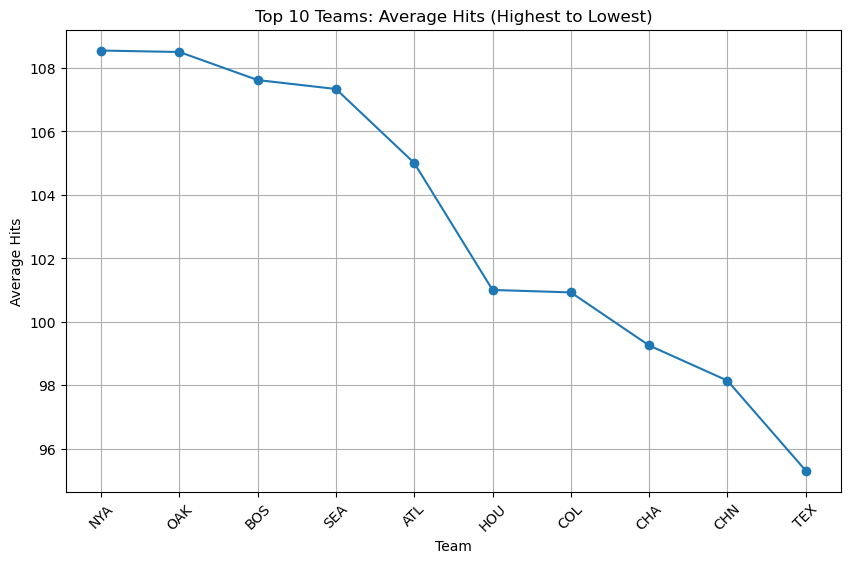

In [35]:
# Group by 'Team' and calculate average hits, then sort in descending order
team_stats = merged_df.groupby('Team')['Hits'].mean().sort_values(ascending=False)

# filter the top 10 teams
top_10_teams = team_stats.head(10)

# Creating a line chart for average hits
plt.figure(figsize=(10, 6))
plt.plot(top_10_teams.index, top_10_teams, marker='o')  # 'o' adds circle markers to each point
plt.title('Top 10 Teams: Average Hits (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Average Hits')
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

<b>Top 10 Teams: Average Runs (Highest to LowestTop 10 Teams: Average Runs (Highest to Lowest)<b>

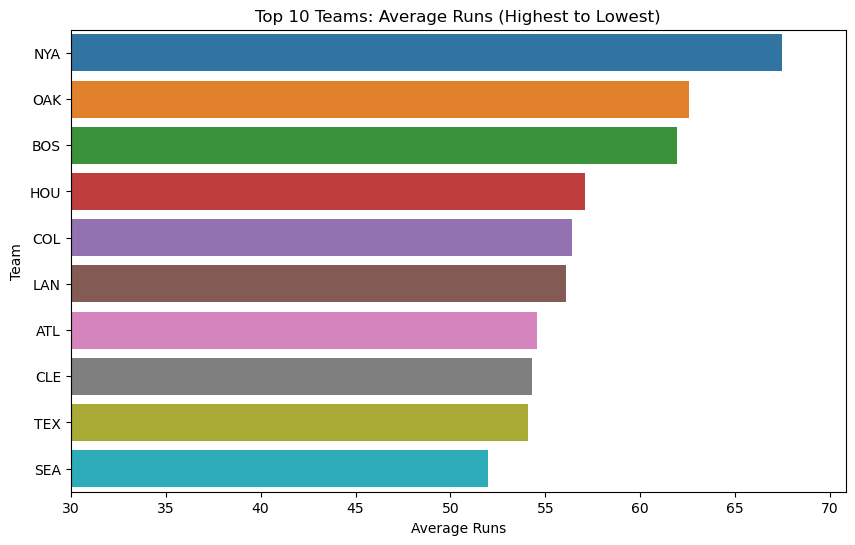

In [34]:
team_stats = merged_df.groupby('Team').agg({'Runs':'mean'})

# Sorting the team_stats DataFrame by 'Runs' in descending order
sorted_team_stats = team_stats.sort_values('Runs', ascending=False)

# Filter only the top 10 teams
top_10_teams = sorted_team_stats.head(10)

# Creating the bar chart with sorted and filtered data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_teams['Runs'], y=top_10_teams.index)

# Adjust the x-axis to start at 30
plt.xlim(30, None)

# Adding title and labels
plt.title('Top 10 Teams: Average Runs (Highest to Lowest)')
plt.xlabel('Average Runs')
plt.ylabel('Team')

# Display the plot
plt.show()

<b> Top 10 Teams: Average Home Runs (Highest to Lowest) <b>

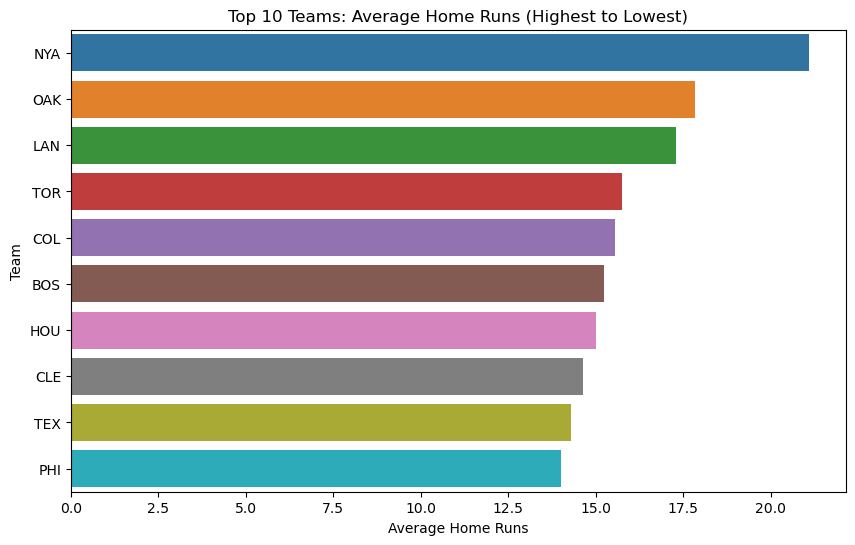

In [36]:
# Sorting the team_stats DataFrame by 'Runs' in descending order
team_stats = merged_df.groupby('Team').agg({'Home Runs':'mean'})

# Sorting the team_stats DataFrame by 'Home Runs' in descending order
sorted_team_stats = team_stats.sort_values('Home Runs', ascending=False)

# Filter only the top 10 teams
top_10_teams = sorted_team_stats.head(10)

# Creating the bar chart with sorted and filtered data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_teams['Home Runs'], y=top_10_teams.index)
plt.title('Top 10 Teams: Average Home Runs (Highest to Lowest)')
plt.xlabel('Average Home Runs')
plt.ylabel('Team')

plt.show()

<b> Top 10 Teams: Wins (Highest to Lowest) <b>

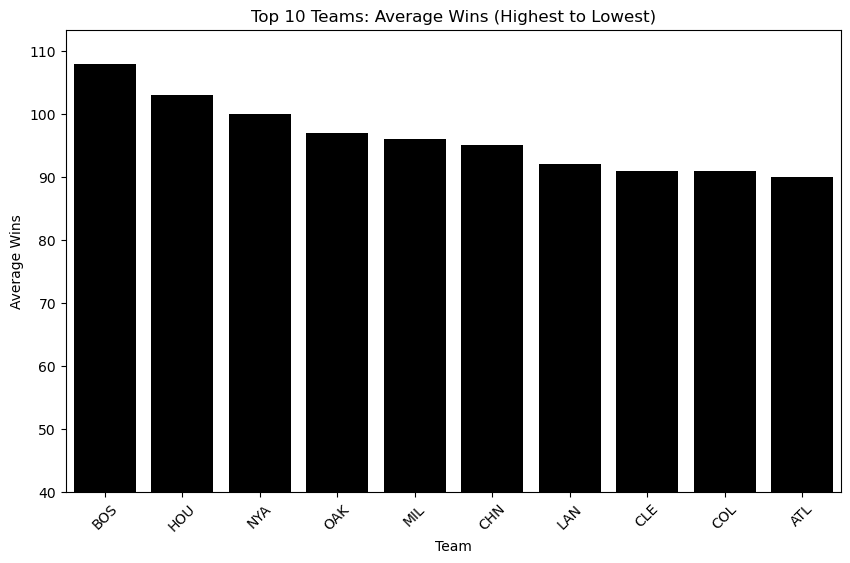

In [37]:
# Group by 'Team' and calculate average wins, then sort in descending order
team_stats = merged_df.groupby('Team')['Wins'].mean().sort_values(ascending=False)

# Selecting only the top 10 teams
top_10_teams_stats = team_stats.head(10)

# Creating a bar chart for average wins with all bars in black color
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_teams_stats.index, y=top_10_teams_stats, color='black')
plt.title('Top 10 Teams: Average Wins (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Average Wins')
plt.xticks(rotation=45)

# Adjust the y-axis to start at 40
plt.ylim(40, None)

plt.show()

# Team Stats Findings

Analyzing the top five teams across various statistics—Hits, Runs, Home Runs (HRs), and Wins—reveals some interesting trends and insights:

1)  Dominance of Certain Teams: Notably, teams like NYA (New York Yankees), OAK (Oakland Athletics), and BOS (Boston Red Sox) consistently appear across all four categories (Hits, Runs, HRs, Wins). This indicates a strong overall performance by these teams in both offensive metrics (hits, runs, HRs) and overall success (wins).



2) Balanced Strength in Offense and Wins: The presence of teams like BOS and HOU (Houston Astros) in both offensive categories (Hits and Runs) and the Wins category suggests that their successful hitting contributes significantly to their overall game victories. This implies a correlation between strong offensive play and winning games.



3)  Specialization in Specific Areas: Some teams appear to specialize in certain aspects of the game. For instance, teams like LAN (Los Angeles Dodgers) and COL (Colorado Rockies) are more prominent in HRs, which might indicate a focus or strength in power hitting. However, their less frequent appearance in the Wins category could suggest that while they excel in certain offensive areas, it may not always translate to a higher number of wins.




# Player stats 

<b>Runs<b>

In [38]:
# Group by 'Name' and calculate average of 'Runs'
player_avg_runs = merged_df.groupby('Player Name')['Runs'].mean()

# Convert player_avg_runs to a DataFrame and reset the index
player_avg_runs_df = player_avg_runs.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average runs DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_runs_df, unique_name_team, on = ('Player Name'))

# Sort by average 'Runs' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Runs', ascending=False).head(10)

# Display the top ten players along with their average runs and team names
print("Top 10 Players with the Most Runs:")
top_ten_players_with_teams[['Player Name', 'Runs', 'Team Name']]


Top 10 Players with the Most Runs:


,Player Name,Runs,Team Name
132,Francisco Lindor,129.0,Cleveland Indians
295,Mookie Betts,129.0,Boston Red Sox
70,Charlie Blackmon,119.0,Colorado Rockies
79,Christian Yelich,118.0,Milwaukee Brewers
157,J. D. Martinez,111.0,Boston Red Sox
267,Matt Carpenter,111.0,St. Louis Cardinals
216,Jose Ramirez,110.0,Cleveland Indians
22,Alex Bregman,105.0,Houston Astros
312,Ozzie Albies,105.0,Atlanta Braves
307,Nolan Arenado,104.0,Colorado Rockies


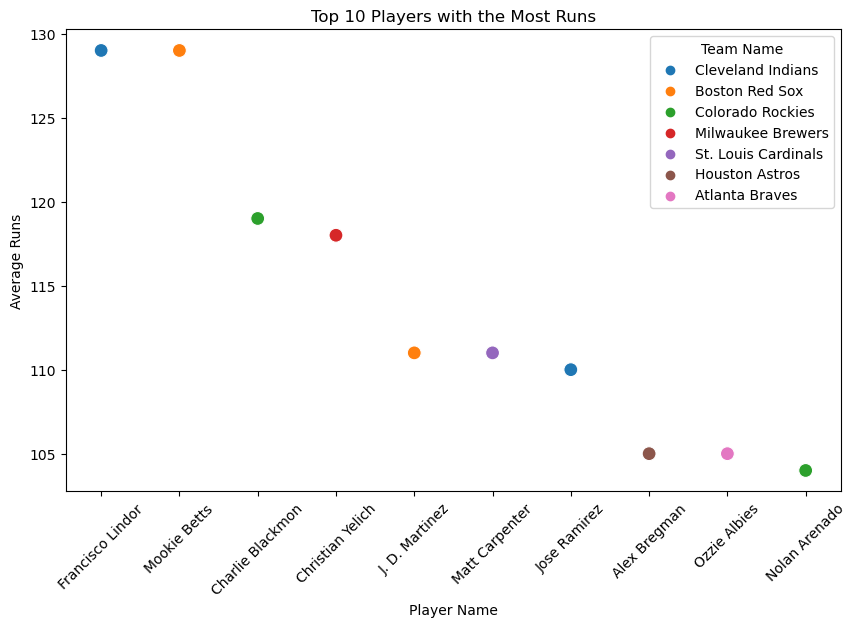

In [39]:
player_avg_runs = merged_df.groupby('Player Name')['Runs'].mean()

# Convert player_avg_runs to a DataFrame and reset the index
player_avg_runs_df = player_avg_runs.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average runs DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_runs_df, unique_name_team, on=('Player Name'))

# Sort by average 'Runs' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Runs', ascending=False).head(10)

# Create a visual representation (scatter plot) for the top ten players
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player Name', y='Runs', hue='Team Name', data=top_ten_players_with_teams, s=100)
plt.title('Top 10 Players with the Most Runs')
plt.xlabel('Player Name')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

<b>Hits<b>

In [40]:
player_avg_hits = merged_df.groupby('Player Name')['Hits'].mean()
# Convert player_avg_hits to a DataFrame and reset the index
player_avg_hits_df = player_avg_hits.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average hits DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_hits_df, unique_name_team, on=('Player Name'))

# Sort by average 'Hits' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Hits', ascending=False).head(10)

# Display the top ten players along with their average hits and team names
print("Top 10 Players with the Most Hits:")
top_ten_players_with_teams[['Player Name', 'Hits', 'Team Name']]


Top 10 Players with the Most Hits:


,Player Name,Hits,Team Name
382,Whit Merrifield,192.0,Kansas City Royals
135,Freddie Freeman,191.0,Atlanta Braves
157,J. D. Martinez,188.0,Boston Red Sox
79,Christian Yelich,187.0,Milwaukee Brewers
302,Nick Markakis,185.0,Atlanta Braves
299,Nick Castellanos,185.0,Detroit Tigers
132,Francisco Lindor,183.0,Cleveland Indians
70,Charlie Blackmon,182.0,Colorado Rockies
214,Jose Peraza,182.0,Cincinnati Reds
345,Scooter Gennett,181.0,Cincinnati Reds


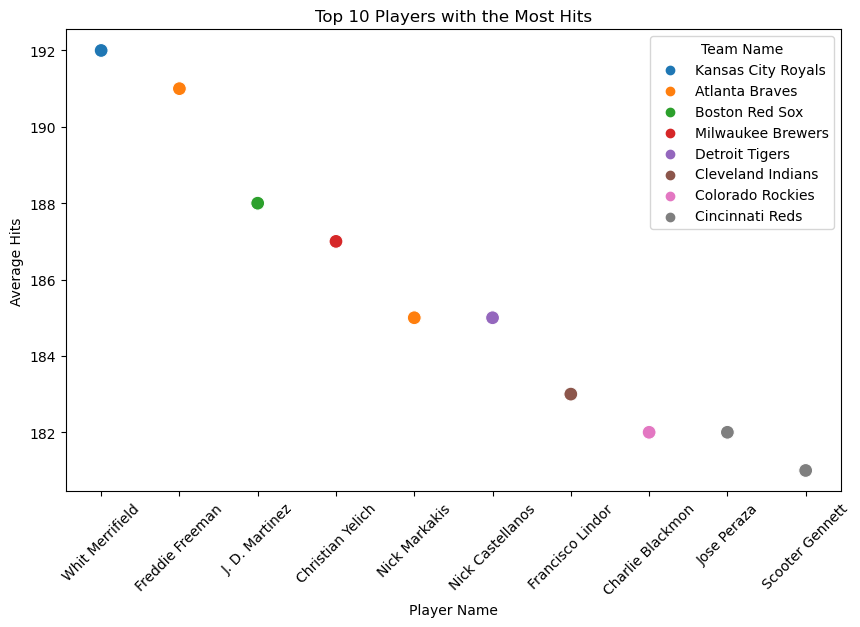

In [41]:
# Group by 'Player Name' and calculate average of 'Hits'
player_avg_hits = merged_df.groupby('Player Name')['Hits'].mean()

# Convert player_avg_hits to a DataFrame and reset the index
player_avg_hits_df = player_avg_hits.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average hits DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_hits_df, unique_name_team, on=('Player Name'))

# Sort by average 'Hits' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Hits', ascending=False).head(10)

# Create a visual representation (scatter plot) for the top ten players
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player Name', y='Hits', hue='Team Name', data=top_ten_players_with_teams, s=100)
plt.title('Top 10 Players with the Most Hits')
plt.xlabel('Player Name')
plt.ylabel('Average Hits')
plt.xticks(rotation=45)
plt.show()

<b>Home Runs<b>

In [42]:
# Group by 'Player Name' and calculate average of 'Home Runs'
player_avg_hr = merged_df.groupby('Player Name')['Home Runs'].mean()

# Convert player_avg_hr to a DataFrame and reset the index
player_avg_hr_df = player_avg_hr.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average home runs DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on=('Player Name'))

# Sort by average 'Home Runs' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Home Runs', ascending=False).head(10)

# Display the top ten players along with their average home runs and team names
print("Top 10 Players with the Most Home Runs:")
top_ten_players_with_teams[['Player Name', 'Home Runs', 'Team Name']]

Top 10 Players with the Most Home Runs:


,Player Name,Home Runs,Team Name
235,Khris Davis,48.0,Oakland Athletics
157,J. D. Martinez,43.0,Boston Red Sox
190,Joey Gallo,40.0,Texas Rangers
216,Jose Ramirez,39.0,Cleveland Indians
140,Giancarlo Stanton,38.0,New York Yankees
132,Francisco Lindor,38.0,Cleveland Indians
307,Nolan Arenado,38.0,Colorado Rockies
370,Trevor Story,37.0,Colorado Rockies
297,Nelson Cruz,37.0,Seattle Mariners
267,Matt Carpenter,36.0,St. Louis Cardinals


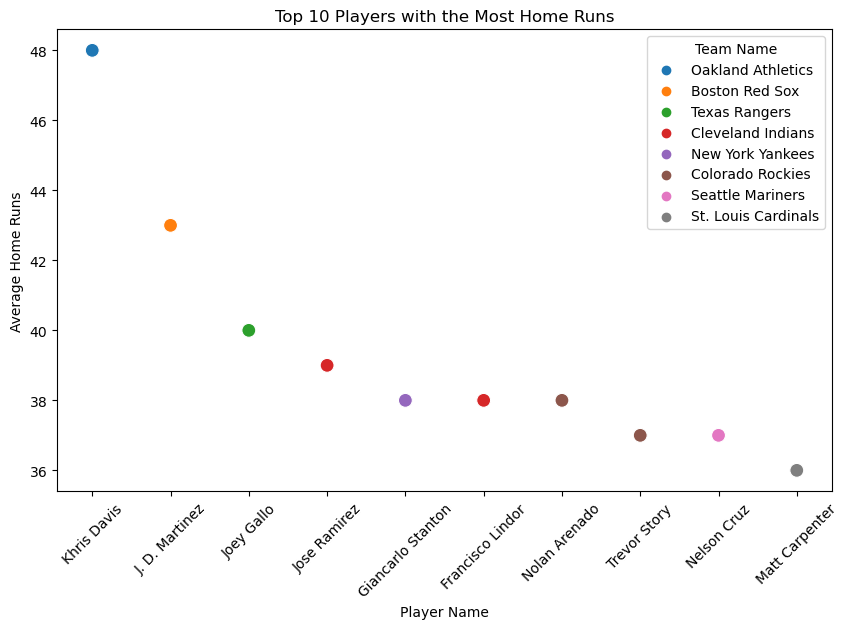

In [43]:
player_avg_hr = merged_df.groupby('Player Name')['Home Runs'].mean()

# Convert player_avg_hr to a DataFrame and reset the index
player_avg_hr_df = player_avg_hr.reset_index()

# Create a DataFrame with unique player-team pairs
unique_name_team = merged_df[['Player Name', 'Team Name']].drop_duplicates()

# Merge the player average home runs DataFrame with the unique name-team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on=('Player Name'))

# Sort by average 'Home Runs' in descending order and select top 10
top_ten_players_with_teams = merged_with_teams.sort_values(by='Home Runs', ascending=False).head(10)

# Create a visual representation (scatter plot) for the top ten players
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player Name', y='Home Runs', hue='Team Name', data=top_ten_players_with_teams, s=100)
plt.title('Top 10 Players with the Most Home Runs')
plt.xlabel('Player Name')
plt.ylabel('Average Home Runs')
plt.xticks(rotation=45)
plt.show()


# Player Stats Findings

<b>1)  Cross-Category Excellence:</B> Certain players appear in more than one top-10 category, indicating their all-around offensive prowess. For example, Francisco Lindor (Cleveland Indians) and Christian Yelich (Milwaukee Brewers) are featured in both the Runs and Hits categories. J.D. Martinez (Boston Red Sox) is prominent in all three categories (Runs, Hits, HRs), underscoring his exceptional batting skills.  <br><br>


<b>2) Team Representation:</B> The Boston Red Sox and Cleveland Indians have multiple players in these top-10 lists, suggesting a strong offensive lineup in these teams. This could be a significant factor contributing to their overall team performance.<br><br>

<b>3)  Specialization in Skill Sets:</B> Some players seem to specialize in specific aspects of batting. For instance, Khris Davis (Oakland Athletics) and Joey Gallo (Texas Rangers) are among the top in HRs but not in Runs or Hits, indicating their power-hitting capabilities.<br><br>

<b>4)  Emerging Patterns in Player Performance:</B> The presence of players like Francisco Lindor, Nolan Arenado, and Christian Yelich in multiple lists indicates their consistency and reliability as top performers in the league.<br><br>

# Concusion 



Historically, teams with a strong offensive lineup, like the 2018 Boston Red Sox, have shown success in the postseason. The Red Sox's victory in the 2018 World Series, backed by their players' high rankings in key batting statistics, exemplifies this trend. However, it's important to note that while this is a supportive factor, it's not an absolute predictor.  

The contrasting postseason fates of the 2018 Milwaukee Brewers and Los Angeles Dodgers encapsulate the unpredictable nature of baseball playoffs. While the Brewers, leading the National League in regular-season wins, did not advance to the World Series, the Dodgers made it to the finals despite having fewer wins and lacking top-10 players in key statistics. This dichotomy highlights that success in baseball is not solely contingent on regular-season performance or individual statistical dominance. Factors like playoff experience, team depth, balanced contributions across the roster, strategic in-game decisions, and effective bullpen management play pivotal roles in navigating the intricacies and pressures of postseason baseball, often overriding regular-season achievements.

The 2018 Milwaukee Brewers and Los Angeles Dodgers contrasting postseason performance captures the unpredicatable nature of the sport of baseball.  While the Brewers, leading the National League in regular-season wins, did not advance to the World Series, the Dodgers made it to the finals despite having fewer wins and lacking top-10 players in key statistics.  Factors like playoff experience, team depth, balanced contributions across the roster, strategic in-game decisions, and effective bullpen management play pivotal roles in navigating the intricacies and pressures of the sport, which are often not seen in other team sports.  